In [1]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv('data.csv')

In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [66]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,engine_cylinder * HP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2010.0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,1800.0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,1800.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,1380.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,1380.0


### Data Transformation : creating new columns(feature engineering)

In [ ]:
df['engine_cylinder * HP'] = df['Engine HP'] * df['Engine Cylinders']

# extracting date type (year , month , date)
# df['date'] = df.['dates'].dt.date()

# .apply method -- to apply a function 

# def get_price()
# df['get_prices'] = df['price'].apply(get_price)

C:\Users\HP\AppData\Local\Temp\ipykernel_38016\2227352262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_cylinder * HP'] = df['Engine HP'] * df['Engine Cylinders']


### interQuartile range for anomly detection

In [6]:
import seaborn as sns

<Axes: xlabel='highway MPG'>

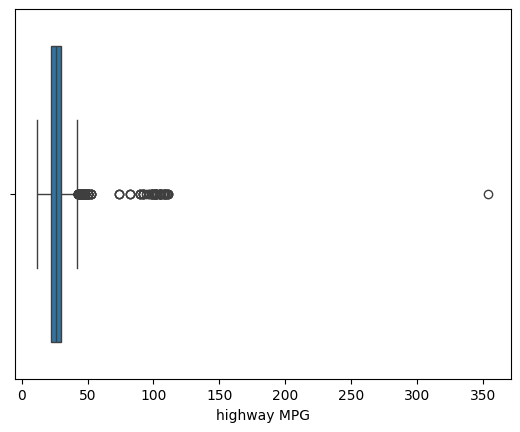

In [39]:
sns.boxplot(x=df['highway MPG'])

In [56]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [57]:
df = df.dropna()

In [41]:
Q1 = df['Popularity'].quantile(0.25)
Q3 = df['Popularity'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

1460.0


In [43]:
import matplotlib.pyplot as plt

## histogram 
visualizing frequency

Text(0.5, 0, 'Company')

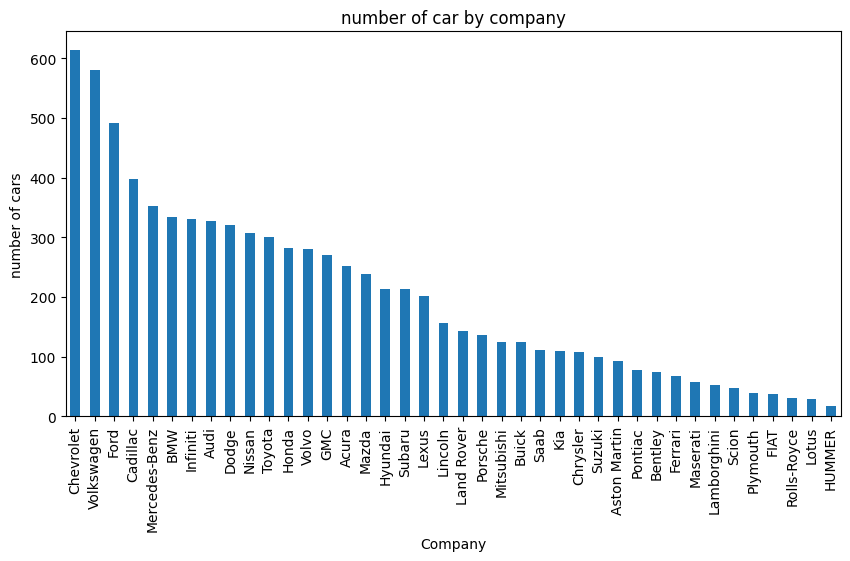

In [63]:
df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title('number of car by company')
plt.ylabel('number of cars')
plt.xlabel('Company')